In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [4]:
np.random.seed(123)
tf.random.set_seed(123)

In [12]:
dataframe = pd.read_csv('airline_passengers.csv') # pandas->DataFrame
print(dataframe.dtypes)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

vals = dataframe.iloc[:, [False, True]].values # numpy->ndarray
# https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html

Month         object
Passengers     int64
dtype: object


In [19]:
len(dataframe)

144

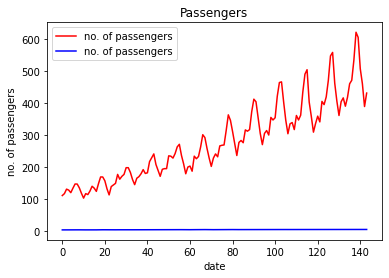

In [14]:
import matplotlib.pyplot as plt

val_linear = [row[0] for row in vals] 

plt.plot(val_linear, color = 'red', label = 'no. of passengers')
plt.title('Passengers')
plt.xlabel('date')
plt.ylabel('no. of passengers')
plt.legend()
plt.show()

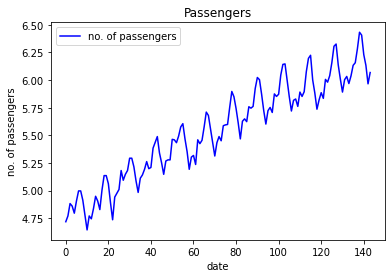

In [15]:
val_log = np.log(val_linear)

plt.plot(val_log, color = 'blue', label = 'no. of passengers')
plt.title('Passengers')
plt.xlabel('date')
plt.ylabel('no. of passengers')
plt.legend()
plt.show()

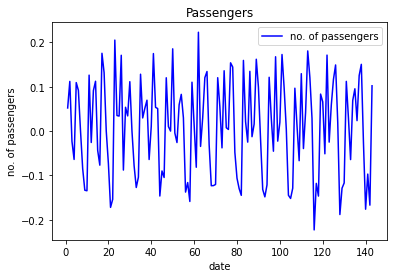

In [17]:
val_log_diff = pd.DataFrame(val_log).diff()

plt.plot(val_log_diff, color = 'blue', label = 'no. of passengers')
plt.title('Passengers')
plt.xlabel('date')
plt.ylabel('no. of passengers')
plt.legend()
plt.show()

In [27]:
test = val_log_diff[:-12]
# test = np.ndarray(shape=(len(test)), data=np.array(test))
test = np.take(test, indices=range(0, 144 - 12))
train = val_log_diff[-12:]
# train = np.ndarray(shape=(len(train)), data=np.array(train))
train = np.take(train, indices=range(0, 12))

ValueError: No axis named None for object type DataFrame

In [ ]:
x_train = []
y_train = []
for i in range(10, 144):
    x_train.append(train[i-10:i, 0])
    y_train.append(train[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))